# B28407
# M24B38/017
# AI PROJECT EXAM

Importing the required libraries for EDA

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### 1. Problem


a) Target (output): label - The crop

b) Inputs (features): These are a collection of features that include:
    - Soil Nutrients
    - Soil condition (pH, Moisture)
    - Climate conditions - (Wind Speed, Temperature)

c) Task type: This is a regression problem

d) Evaluation metrics: 

    - Accuracy

    - Precision

    - F1-score

    - MSE

    - RMSE

    - R² Score

e) Relevance: Briefly explain the importance of the problem and why AI is a suitable solution.
- The problem is that farmers do not know what needs to planted where based off the climatic consitions of the area especially in a time when we have all the changes in the climatic conditions.
- The AI models deal with this best because they learn, store the weights and make use of these when new data arrives and they are thus able to predict the crop that should be planted in a certain area.

### 2. Dataset



a) It was secondary data obtained from a public dataset repository.

b) Description



| Characteristic | Detail |
| :--- | :--- |
| **Number of Samples** | 3,867 observations (rows) |
| **Number of Features** | 28 Input Features (columns) |
| **Target Variable** | `label` (Categorical) |
| **Target Variable Content** | Crop Type, primarily cereals (e.g., Barley). This is the variable the model aims to predict. |
| **Data Sources** | Ethiopian Agricultural Transformation Agency (ATA), Ethiopian Statistics Service (ESS), and NASA Prediction of Worldwide Energy Resource (POWER). |
| **Feature Categories** | **Soil Nutrients:** Ph, K, P, N, Zn, S, Soilcolor. **Climate/Geospatial:** QV2M (Humidity), T2M (Temperature), PRECTOTCORR (Precipitation), WD10M (Wind Direction), GWETTOP (Soil Wetness), CLOUD_AMT, WS2M_RANGE, PS (Surface Pressure). |


Dataset Details


| Column Name | NASA POWER Parameter | Hypothetical Context/Unit | Reference/Source |
| :--- | :--- | :--- | :--- |
| QV2M | **Specific Humidity at 2 Meters** | Atmospheric Humidity Content ($\text{kg} \text{ water} / \text{kg} \text{ total} \text{ air}$) | NASA POWER Parameter Dictionary |
| T2M_MAX | **Maximum Temperature at 2 Meters** | Average Seasonal Maximum Temperature ($\text{C}$ or $\text{K}$) | NASA POWER Parameter Dictionary |
| T2M_MIN | **Minimum Temperature at 2 Meters** | Average Seasonal Minimum Temperature ($\text{C}$ or $\text{K}$) | NASA POWER Parameter Dictionary |
| PRECTOTCORR | **Total Corrected Precipitation** | Seasonal Sum of Precipitation ($\text{mm}$) | NASA POWER Parameter Dictionary |
| WD10M | **Wind Direction at 10 Meters** | Dominant Wind Direction ($\text{degrees}$) | NASA POWER Parameter Dictionary |
| GWETTOP | **Ground Water Content in the Top Layer** | Topsoil Moisture/Wetness (Fraction 0-1) | NASA POWER Parameter Dictionary |
| CLOUD_AMT | **Cloud Amount/Cloud Cover** | Total Fractional Cloud Cover (Percentage/Fraction) | NASA POWER Parameter Dictionary |
| WS2M_RANGE | **Wind Speed at 2 Meters Range** | Variability in Wind Speed ($\text{m}/\text{s}$) | NASA POWER Parameter Dictionary |
| PS | **Surface Pressure** | Average Atmospheric Pressure ($\text{kPa}$ or $\text{hPa}$) | NASA POWER Parameter Dictionary |


Details of the Seasons

| Short Form | Season | Typical Period (Northern Hemisphere/Ethiopian Context) |
| :--- | :--- | :--- |
| **-W** | **Winter** | Approximately December to February |
| **-Sp** | **Spring** | Approximately March to May |
| **-Su** | **Summer** | Approximately June to August |
| **-Au** | **Autumn** | Approximately September to November |


Ethical Concerns:
| Criteria | Assessment | Rationale |
| :--- | :--- | :--- |
| **Suitability for AI** | High | Contains a balanced mix of categorical (`Soilcolor`, `label`) and numerical (soil nutrient and climate) features, including seasonal aggregates. This blend allows for the application of advanced machine learning techniques (e.g., Random Forest, Gradient Boosting) for classification. The data is pre-processed (all non-null values), indicating initial data quality steps have been taken. |
| **Relevance** | Very High | All features directly align with the known scientific factors influencing crop growth: soil chemistry, temperature, and precipitation. Sourcing from local authorities (ATA, ESS) ensures regional context and relevance to the specific agricultural systems in Ethiopia. |
| **Ethical Use** | Generally Acceptable | The key ethical concern in agricultural data—farmer privacy and data ownership—is likely mitigated by the nature of the features: aggregate climate data (geospatial/model outputs) and soil properties (field-level measurements). The description does not mention individual farmer names, specific farm IDs, income, or other highly personal data. The use of data from the Ethiopian Agricultural Transformation Agency (ATA) and the Ethiopian Statistics Service (ESS) suggests the data has likely gone through official channels that typically involve aggregation, anonymization, and governance to protect smallholder farmers' privacy. |


**Source** - https://data.mendeley.com/datasets/8v757rr4st/1

### 3. EDA

In [182]:
## Load the dataset
farmer_advisor = pd.read_csv("CropWeatherPrediction.csv")



In [183]:
farmer_advisor.head()


,Soilcolor,Ph,K,P,N,Zn,S,QV2M-W,QV2M-Sp,QV2M-Su,...,PRECTOTCORR-W,PRECTOTCORR-Sp,PRECTOTCORR-Su,PRECTOTCORR-Au,WD10M,GWETTOP,CLOUD_AMT,WS2M_RANGE,PS,label
0,Yellowish brown,5.81,738.231,5.401,0.23,2.976000,13.816,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
1,Yellowish brown,5.43,606.382,10.478,0.23,3.077000,16.421,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
2,brown,5.41,386.580,6.847,0.23,6.611000,16.557,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
3,red,5.65,207.086,3.418,0.23,0.460181,16.075,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
4,red,5.27,317.357,39.282,0.23,2.743000,12.558,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley


In [184]:
print(farmer_advisor.shape)


(3867, 29)


In [185]:
farmer_advisor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Soilcolor       3867 non-null   object 
 1   Ph              3867 non-null   float64
 2   K               3867 non-null   float64
 3   P               3867 non-null   float64
 4   N               3867 non-null   float64
 5   Zn              3867 non-null   float64
 6   S               3867 non-null   float64
 7   QV2M-W          3867 non-null   float64
 8   QV2M-Sp         3867 non-null   float64
 9   QV2M-Su         3867 non-null   float64
 10  QV2M-Au         3867 non-null   float64
 11  T2M_MAX-W       3867 non-null   float64
 12  T2M_MAX-Sp      3867 non-null   float64
 13  T2M_MAX-Su      3867 non-null   float64
 14  T2M_MAX-Au      3867 non-null   float64
 15  T2M_MIN-W       3867 non-null   float64
 16  T2M_MIN-Sp      3867 non-null   float64
 17  T2M_MIN-Su      3867 non-null   f

In [186]:
farmer_advisor.isnull().sum()

Soilcolor         0
Ph                0
K                 0
P                 0
N                 0
Zn                0
S                 0
QV2M-W            0
QV2M-Sp           0
QV2M-Su           0
QV2M-Au           0
T2M_MAX-W         0
T2M_MAX-Sp        0
T2M_MAX-Su        0
T2M_MAX-Au        0
T2M_MIN-W         0
T2M_MIN-Sp        0
T2M_MIN-Su        0
T2M_MIN-Au        0
PRECTOTCORR-W     0
PRECTOTCORR-Sp    0
PRECTOTCORR-Su    0
PRECTOTCORR-Au    0
WD10M             0
GWETTOP           0
CLOUD_AMT         0
WS2M_RANGE        0
PS                0
label             0
dtype: int64

There are no missing values in the dataset.

In [187]:
farmer_advisor.describe()

,Ph,K,P,N,Zn,S,QV2M-W,QV2M-Sp,QV2M-Su,QV2M-Au,...,T2M_MIN-Au,PRECTOTCORR-W,PRECTOTCORR-Sp,PRECTOTCORR-Su,PRECTOTCORR-Au,WD10M,GWETTOP,CLOUD_AMT,WS2M_RANGE,PS
count,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,...,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000
mean,5.857295,324.284770,11.349588,0.179153,1.774094,11.311625,8.346870,9.082508,12.232020,10.990747,...,8.934315,1.555862,4.023404,14.517500,4.762687,71.579444,0.709028,51.630709,8.262413,78.426168
std,0.676690,202.250133,34.141864,0.066476,1.460809,5.542094,0.613948,0.790654,0.894970,0.993861,...,2.046221,0.691682,1.117531,4.111199,1.394398,80.929898,0.055355,16.328656,9.661188,2.380380
min,4.300000,41.134000,0.000000,0.000262,0.100000,0.050000,7.183333,7.650000,10.476667,9.070000,...,3.980000,0.000000,1.940000,4.836667,2.156667,0.060000,0.520000,0.460000,4.860000,74.170000
25%,5.390000,191.000000,2.000000,0.131200,1.100000,7.305000,7.933333,8.403333,11.430000,10.150000,...,8.260000,0.910000,3.246667,11.866667,3.463333,36.060000,0.690000,48.620000,5.410000,77.150000
50%,5.780000,282.000000,4.000000,0.179884,1.500000,10.700000,8.383333,9.340000,12.166667,10.926667,...,8.380000,1.736667,4.410000,16.620000,5.430000,68.940000,0.730000,59.110000,6.010000,78.250000
75%,6.200000,405.000000,7.920000,0.230000,2.060000,14.195500,8.910000,9.480000,12.836667,11.433333,...,10.700000,2.073333,5.203333,17.816667,5.823333,88.310000,0.740000,59.110000,6.240000,79.610000
max,8.500000,2119.000000,782.000000,0.695600,45.500000,118.347000,9.723333,10.703333,13.853333,12.800000,...,13.643333,2.780000,5.660000,19.920000,7.420000,354.880000,0.800000,59.110000,46.100000,83.760000


In [188]:
## detecting the outliers in the dataset

def detect_outliers(df, method='iqr', threshold=1.5):
    """
    Checks for outliers in all numerical columns of a pandas DataFrame.
    
    Parameters:
    - df: The input pandas DataFrame.
    - method: 'iqr' (default) or 'zscore'.
    - threshold: Multiplier for IQR (default 1.5) or standard deviations for Z-score (default 3).
    
    Returns:
    - A summary dictionary containing count and indices of outliers per column.
    - A DataFrame containing only the rows with outliers.
    """
    # Select only numerical columns since outliers generally check numerical data
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    
    outlier_indices = set()
    report = {}
    if method == 'iqr':
        for col in numerical_cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - (threshold * IQR)
            upper_bound = Q3 + (threshold * IQR)
            
            # Get indices of outliers in this column
            col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
            
            if not col_outliers.empty:
                report[col] = len(col_outliers)
                outlier_indices.update(col_outliers)
                
    elif method == 'zscore':
        for col in numerical_cols:
            # Calculate Z-scores
            z_scores = np.abs(stats.zscore(df[col].dropna()))
            
            # Get indices of outliers
            # Note: stats.zscore drops NaNs, so we align indices carefully
            col_outliers = df[col].dropna()[z_scores > threshold].index
            
            if not col_outliers.empty:
                report[col] = len(col_outliers)
                outlier_indices.update(col_outliers)
    
    else:
        raise ValueError("Method must be either 'iqr' or 'zscore'")
    # Sort indices and fetch the rows
    outlier_indices = sorted(list(outlier_indices))
    outliers_df = df.loc[outlier_indices]
    
    print(f"--- Outlier Detection Report ({method.upper()} Method) ---")
    if not report:
        print("No outliers found.")
    else:
        for col, count in report.items():
            print(f"Column '{col}': {count} outliers detected")
        print(f"\nTotal unique rows with outliers: {len(outliers_df)}")
        
    return outliers_df
    

In [189]:
detect_outliers(farmer_advisor, method='iqr')

--- Outlier Detection Report (IQR Method) ---
Column 'Ph': 132 outliers detected
Column 'K': 156 outliers detected
Column 'P': 455 outliers detected
Column 'N': 21 outliers detected
Column 'Zn': 221 outliers detected
Column 'S': 53 outliers detected
Column 'T2M_MAX-W': 187 outliers detected
Column 'T2M_MAX-Sp': 187 outliers detected
Column 'T2M_MIN-Sp': 236 outliers detected
Column 'T2M_MIN-Au': 236 outliers detected
Column 'WD10M': 268 outliers detected
Column 'GWETTOP': 129 outliers detected
Column 'CLOUD_AMT': 357 outliers detected
Column 'WS2M_RANGE': 281 outliers detected
Column 'PS': 121 outliers detected

Total unique rows with outliers: 1357


,Soilcolor,Ph,K,P,N,Zn,S,QV2M-W,QV2M-Sp,QV2M-Su,...,PRECTOTCORR-W,PRECTOTCORR-Sp,PRECTOTCORR-Su,PRECTOTCORR-Au,WD10M,GWETTOP,CLOUD_AMT,WS2M_RANGE,PS,label
0,Yellowish brown,5.81,738.231,5.401,0.2300,2.976000,13.816,7.993333,10.456667,11.963333,...,2.073333,5.270000,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
2,brown,5.41,386.580,6.847,0.2300,6.611000,16.557,7.993333,10.456667,11.963333,...,2.073333,5.270000,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
4,red,5.27,317.357,39.282,0.2300,2.743000,12.558,7.993333,10.456667,11.963333,...,2.073333,5.270000,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
5,brown,5.06,148.437,8.480,0.2300,4.511000,17.755,7.993333,10.456667,11.963333,...,2.073333,5.270000,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
7,brown,5.20,380.599,30.300,0.2300,1.772000,13.985,7.993333,10.456667,11.963333,...,2.073333,5.270000,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,black,6.67,378.208,4.490,0.2300,0.514285,14.540,7.650000,7.773333,10.986667,...,1.170000,2.243333,7.520000,2.88,81.06,0.69,53.45,6.48,75.83,Wheat
3863,brown,5.82,231.413,2.997,0.2300,3.039000,13.789,7.183333,7.650000,10.476667,...,2.073333,2.613333,4.836667,3.63,75.69,0.65,0.46,46.10,74.17,Wheat
3864,black,5.75,327.328,12.279,0.2518,2.012000,24.843,7.183333,7.650000,10.476667,...,2.073333,2.613333,4.836667,3.63,75.69,0.65,0.46,46.10,74.17,Wheat
3865,brown,5.47,211.224,3.064,0.2300,3.389000,13.826,7.183333,7.650000,10.476667,...,2.073333,2.613333,4.836667,3.63,75.69,0.65,0.46,46.10,74.17,Wheat


- There are outliers in the dataset.
- These outliers being nearly a third of the dataset may mean something.
- The solution is to cap the data between the 5th and 95th percentiles.

In [190]:
# List of columns identified in your outlier report that need capping
outlier_cols = [
    'Ph', 'K', 'P', 'N', 'Zn', 'S', 
    'T2M_MAX-W', 'T2M_MAX-Sp', 'T2M_MIN-Sp', 'T2M_MIN-Au', 
    'WD10M', 'GWETTOP', 'CLOUD_AMT', 'WS2M_RANGE', 'PS'
]

def cap_outliers_iqr(df, column, factor=1.5):
    """
    Calculates the IQR for a column and caps the values outside the 
    specified fence (Q1 - factor*IQR, Q3 + factor*IQR).
    
    Args:
        df (pd.DataFrame): The input DataFrame.
        column (str): The name of the column to cap.
        factor (float): Multiplier for the IQR (default 1.5).
        
    Returns:
        pd.Series: The capped column data.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define the lower and upper fences
    lower_fence = Q1 - (factor * IQR)
    upper_fence = Q3 + (factor * IQR)
    
    # Cap the values: 
    # Values less than lower_fence are replaced by lower_fence.
    # Values greater than upper_fence are replaced by upper_fence.
    capped_data = np.where(df[column] < lower_fence, lower_fence, df[column])
    capped_data = np.where(capped_data > upper_fence, upper_fence, capped_data)
    
    return pd.Series(capped_data)

# --- Apply the Capping Function ---

# Assuming your DataFrame is named 'farmer_advisor'
# Replace 'farmer_advisor' with your actual DataFrame name if different

print("Starting outlier capping...")

for col in outlier_cols:
    # Check if the column exists in the DataFrame before processing
    if col in farmer_advisor.columns:
        # Apply the capping function to the column
        farmer_advisor[col] = cap_outliers_iqr(farmer_advisor, col, factor=1.5)
        print(f"Capped outliers in column: {col}")
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

print("Outlier capping complete.")

Starting outlier capping...
Capped outliers in column: Ph
Capped outliers in column: K
Capped outliers in column: P
Capped outliers in column: N
Capped outliers in column: Zn
Capped outliers in column: S
Capped outliers in column: T2M_MAX-W
Capped outliers in column: T2M_MAX-Sp
Capped outliers in column: T2M_MIN-Sp
Capped outliers in column: T2M_MIN-Au
Capped outliers in column: WD10M
Capped outliers in column: GWETTOP
Capped outliers in column: CLOUD_AMT
Capped outliers in column: WS2M_RANGE
Capped outliers in column: PS
Outlier capping complete.


In [191]:
detect_outliers(farmer_advisor, method='iqr')

--- Outlier Detection Report (IQR Method) ---
No outliers found.


,Soilcolor,Ph,K,P,N,Zn,S,QV2M-W,QV2M-Sp,QV2M-Su,...,PRECTOTCORR-W,PRECTOTCORR-Sp,PRECTOTCORR-Su,PRECTOTCORR-Au,WD10M,GWETTOP,CLOUD_AMT,WS2M_RANGE,PS,label


In [174]:
farmer_advisor.shape

(3867, 31)

We need to encode the categorical variables in the dataset, that is:

    - Soilcolor
    - label

In [192]:
farmer_advisor['Soilcolor'] = farmer_advisor['Soilcolor'].astype('category')
farmer_advisor['Soilcolor_Encoded'] = farmer_advisor['Soilcolor'].cat.codes

mapping_dict = {category: code for code, category in enumerate(farmer_advisor['Soilcolor'].cat.categories)}
print("--- Encoded DataFrame ---")
farmer_advisor.head()



--- Encoded DataFrame ---


,Soilcolor,Ph,K,P,N,Zn,S,QV2M-W,QV2M-Sp,QV2M-Su,...,PRECTOTCORR-Sp,PRECTOTCORR-Su,PRECTOTCORR-Au,WD10M,GWETTOP,CLOUD_AMT,WS2M_RANGE,PS,label,Soilcolor_Encoded
0,Yellowish brown,5.81,726.000,5.401,0.23,2.976000,13.816,7.993333,10.456667,11.963333,...,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley,24
1,Yellowish brown,5.43,606.382,10.478,0.23,3.077000,16.421,7.993333,10.456667,11.963333,...,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley,24
2,brown,5.41,386.580,6.847,0.23,3.500000,16.557,7.993333,10.456667,11.963333,...,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley,27
3,red,5.65,207.086,3.418,0.23,0.460181,16.075,7.993333,10.456667,11.963333,...,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley,38
4,red,5.27,317.357,16.800,0.23,2.743000,12.558,7.993333,10.456667,11.963333,...,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley,38


In [106]:
print("\n--- Mapping Dictionary ---")
print(mapping_dict)


--- Mapping Dictionary ---
{'Black': 0, 'Brown': 1, 'Dark Brown': 2, 'Dark brown': 3, 'Dark gray': 4, 'Dark greyish brown': 5, 'Dark red': 6, 'Grayish Brown': 7, 'Grayish brown': 8, 'Grayish brown (GB)': 9, 'Light red': 10, 'Lihgtish brown': 11, 'Red': 12, 'Red brown': 13, 'Reddis brown': 14, 'Reddish': 15, 'Reddish broown': 16, 'Reddish brown': 17, 'Reddish gray': 18, 'Redish Brown': 19, 'Redish brown': 20, 'Redishbrown': 21, 'Very dark brown': 22, 'Yellowish Brown': 23, 'Yellowish brown': 24, 'black': 25, 'black;vertisol': 26, 'brown': 27, 'dark brown': 28, 'dark gray': 29, 'dark grayish': 30, 'dark grayish brown': 31, 'dark reddish brown': 32, 'darkbrown': 33, 'gray': 34, 'grayish brown': 35, 'other': 36, 'perl brown': 37, 'red': 38, 'red;luvisols': 39, 'reddish brown': 40, 'reddish brown;moist': 41, 'replacement of inaccessible target red;luvisols': 42, 'very dark brown': 43, 'very dark gray': 44}


In [193]:
## Repeat the same for the label
farmer_advisor['label'] = farmer_advisor['label'].astype('category')
farmer_advisor['label_Encoded'] = farmer_advisor['label'].cat.codes

mapping_dict2 = {category: code for code, category in enumerate(farmer_advisor['label'].cat.categories)}
print("--- Encoded DataFrame ---")
farmer_advisor.head()

--- Encoded DataFrame ---


,Soilcolor,Ph,K,P,N,Zn,S,QV2M-W,QV2M-Sp,QV2M-Su,...,PRECTOTCORR-Su,PRECTOTCORR-Au,WD10M,GWETTOP,CLOUD_AMT,WS2M_RANGE,PS,label,Soilcolor_Encoded,label_Encoded
0,Yellowish brown,5.81,726.000,5.401,0.23,2.976000,13.816,7.993333,10.456667,11.963333,...,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley,24,0
1,Yellowish brown,5.43,606.382,10.478,0.23,3.077000,16.421,7.993333,10.456667,11.963333,...,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley,24,0
2,brown,5.41,386.580,6.847,0.23,3.500000,16.557,7.993333,10.456667,11.963333,...,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley,27,0
3,red,5.65,207.086,3.418,0.23,0.460181,16.075,7.993333,10.456667,11.963333,...,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley,38,0
4,red,5.27,317.357,16.800,0.23,2.743000,12.558,7.993333,10.456667,11.963333,...,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley,38,0


In [144]:
print("\n--- Mapping Dictionary ---")
print(mapping_dict2)


--- Mapping Dictionary ---
{'Barley': 0, 'Bean': 1, 'Dagussa': 2, 'Fallow': 3, 'Maize': 4, 'Niger seed': 5, 'Pea': 6, 'Potato': 7, 'Red Pepper': 8, 'Sorghum': 9, 'Teff': 10, 'Wheat': 11}


In [145]:
continuous_cols = farmer_advisor.select_dtypes(include=['float64', 'int64']).columns


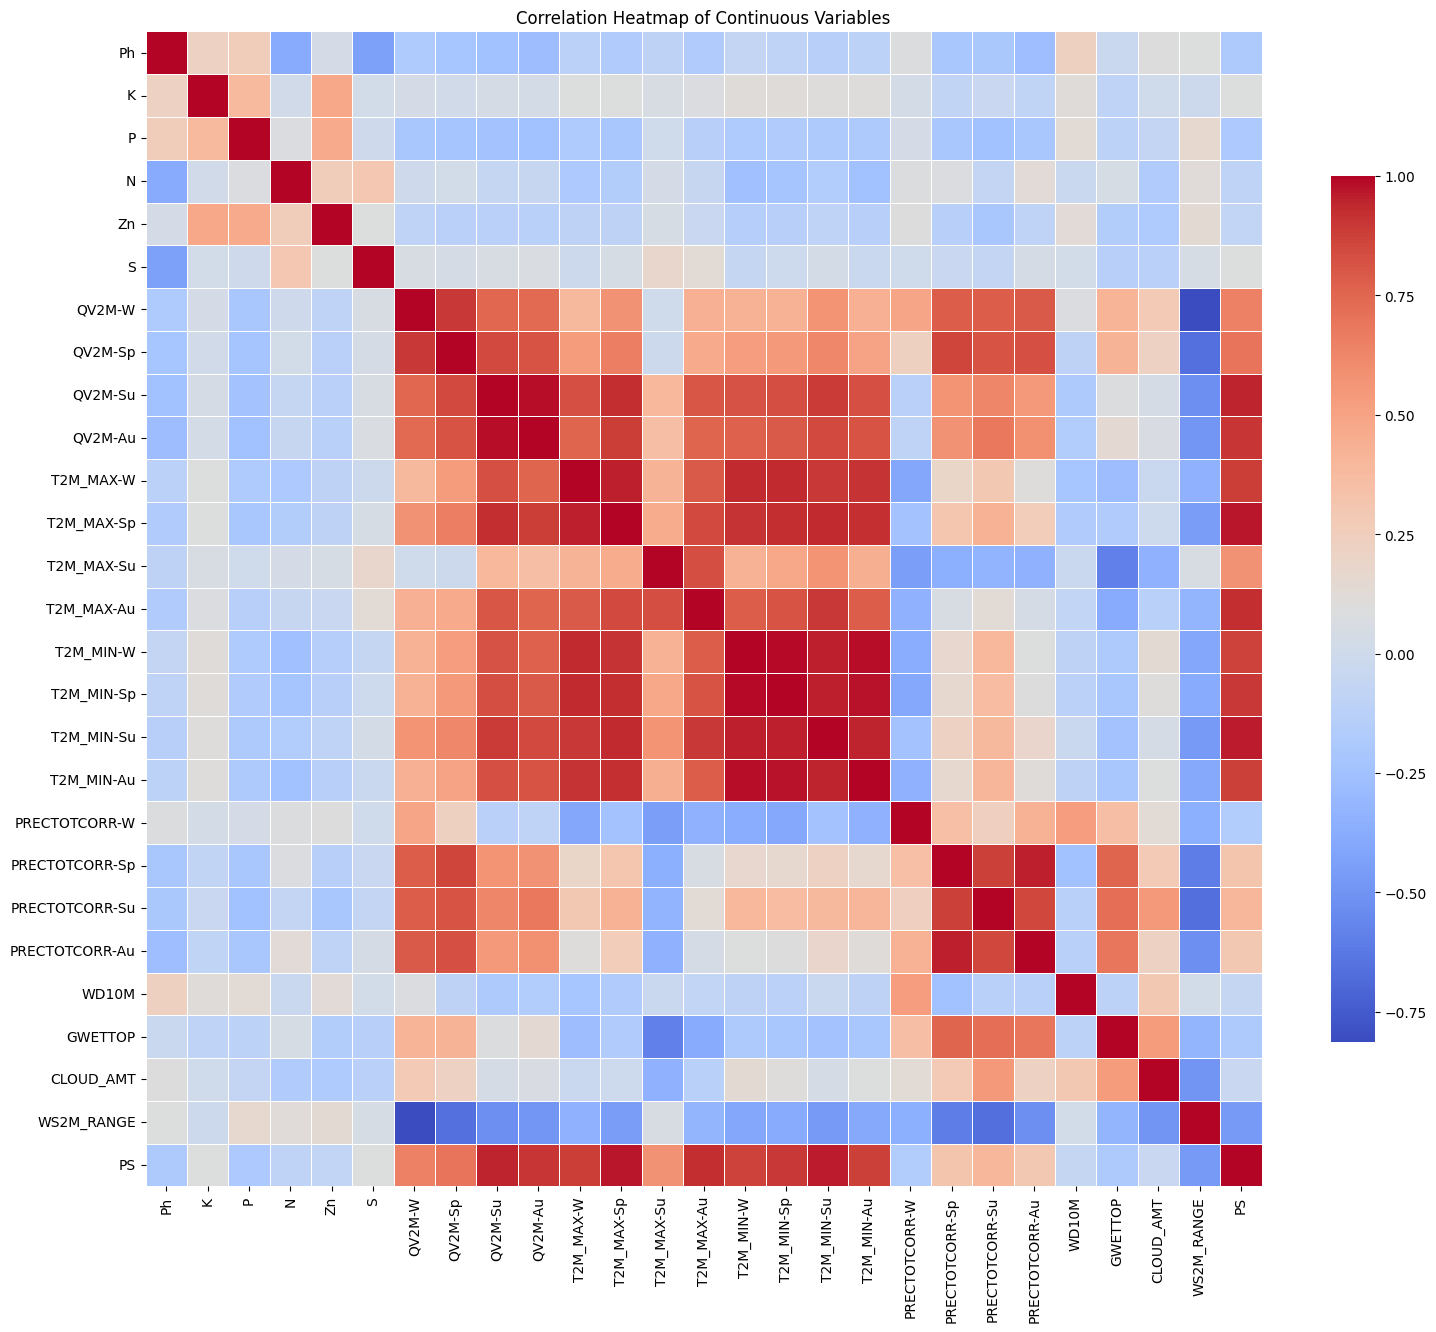

In [146]:
correlation_matrix = farmer_advisor[continuous_cols].corr()


plt.figure(figsize=(18, 15)) # Adjust figure size to better accommodate 30 variables
sns.heatmap(
    correlation_matrix,
    annot=False,        # Set to False, as 30x30 annotations would be too cluttered
    cmap='coolwarm',    # Use a diverging color map
    linewidths=.5,
    cbar_kws={'shrink': .75}
)
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

From the plots above, we see that there is low correlation between all the variables and this will guide our choice of the model that will do tha work.

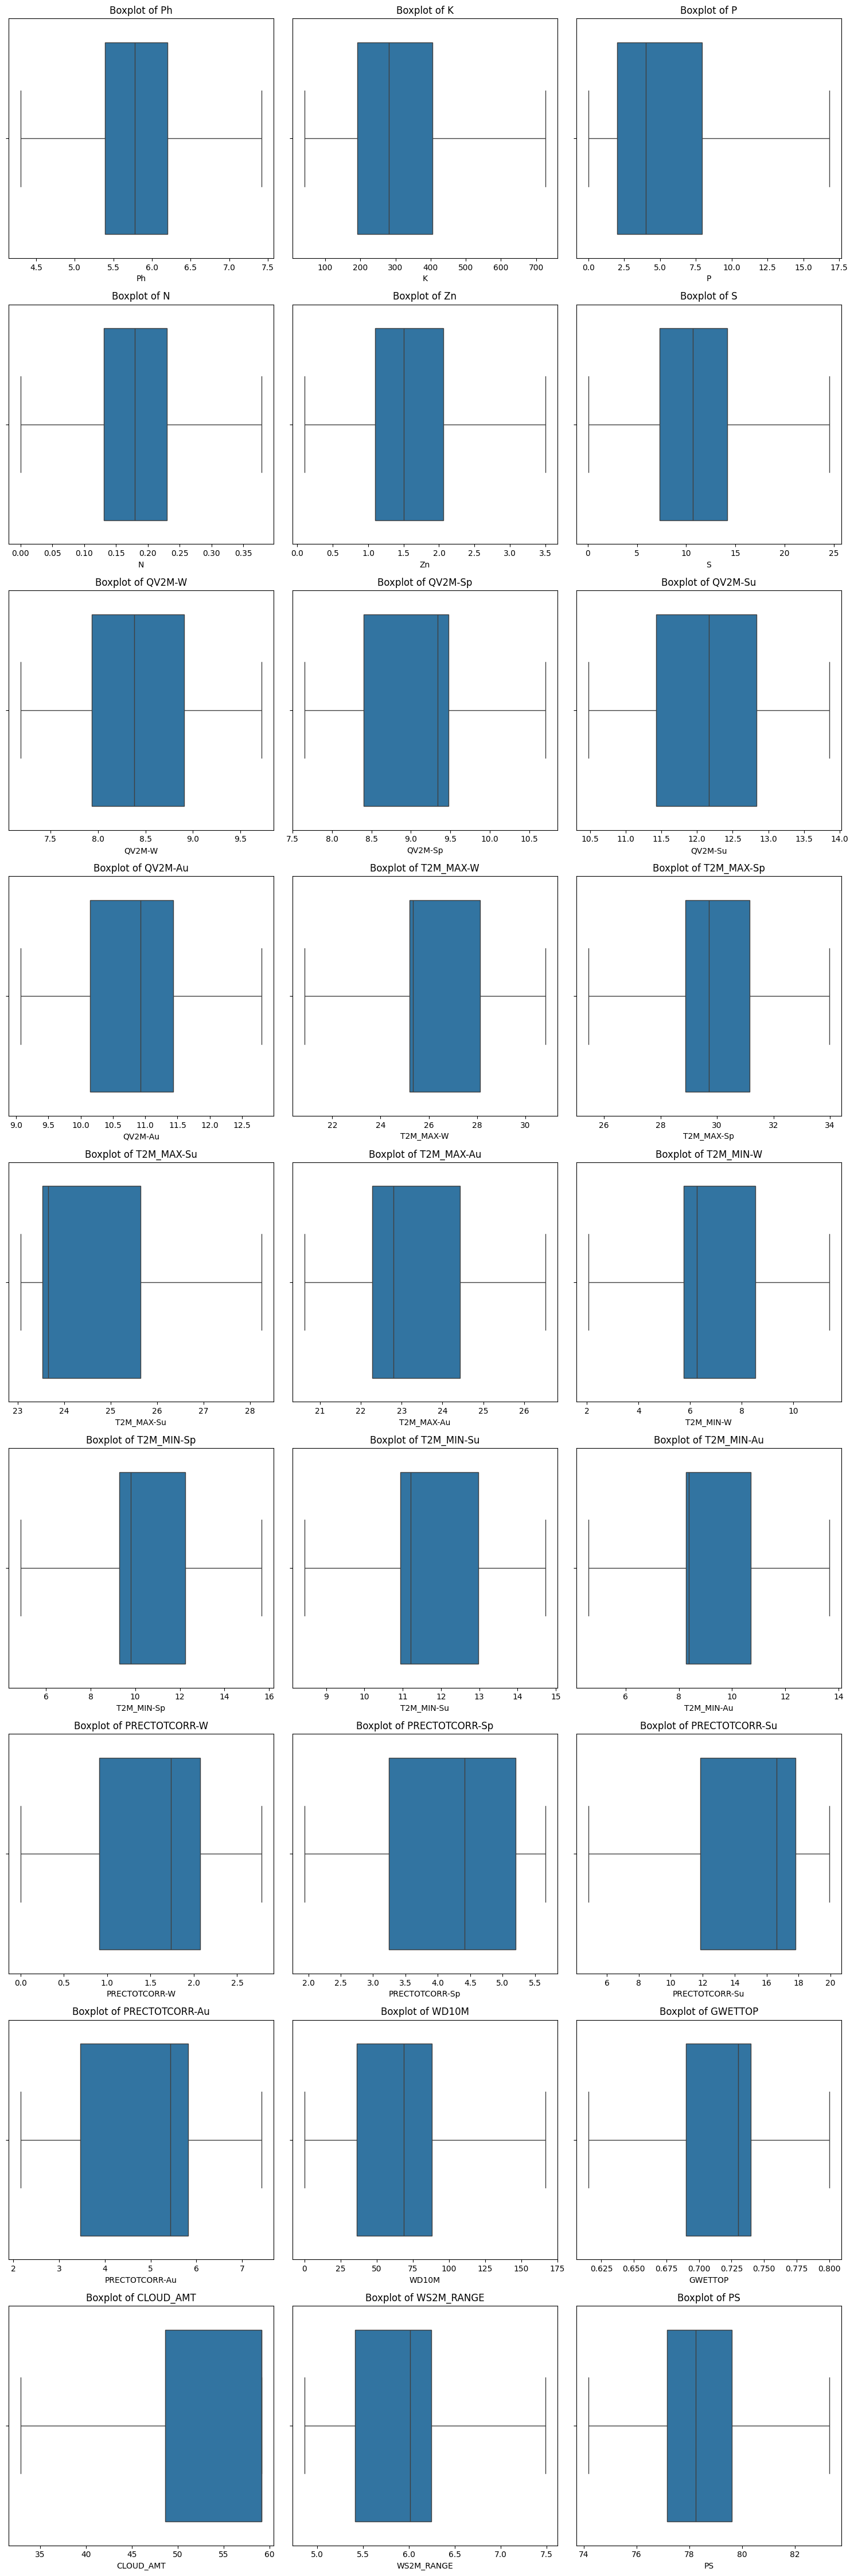

In [147]:
num_cols = 3
num_rows = (len(continuous_cols) + num_cols - 1) // num_cols

# Create the plot
plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(continuous_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=farmer_advisor[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

The data outliers.

### 4. Feature Extraction

a) I will use Mutual Information (MI)

MI quantifies the "amount of information" obtained about one variable (the target variable, 3$Y$) through the observation of another variable (the feature, 4$X$).5It is formally defined in terms of entropy (6$H$), which measures the uncertainty or randomness of a variable.7The mutual information between a feature $X$ and a target $Y$ is:$$I(X; Y) = H(Y) - H(Y|X)$$Intuition: If you know $X$, how much does the uncertainty about $Y$ decrease?High MI: Knowing the feature 8$X$ significantly reduces the uncertainty about the target 9$Y$ (i.e., they are highly dependent/related).10Low MI (or 0): Knowing the feature $X$ provides little to no information about the target $Y$ (i.e., they are independent).

In [148]:
farmer_advisor.head()

,Soilcolor,Ph,K,P,N,Zn,S,QV2M-W,QV2M-Sp,QV2M-Su,...,PRECTOTCORR-Su,PRECTOTCORR-Au,WD10M,GWETTOP,CLOUD_AMT,WS2M_RANGE,PS,label,Soilcolor_Encoded,label_Encoded
0,Yellowish brown,5.81,726.000,5.401,0.23,2.976000,13.816,7.993333,10.456667,11.963333,...,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley,24,0
1,Yellowish brown,5.43,606.382,10.478,0.23,3.077000,16.421,7.993333,10.456667,11.963333,...,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley,24,0
2,brown,5.41,386.580,6.847,0.23,3.500000,16.557,7.993333,10.456667,11.963333,...,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley,27,0
3,red,5.65,207.086,3.418,0.23,0.460181,16.075,7.993333,10.456667,11.963333,...,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley,38,0
4,red,5.27,317.357,16.800,0.23,2.743000,12.558,7.993333,10.456667,11.963333,...,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley,38,0


In [149]:
## we need to split the data into training and testing sets
X = farmer_advisor.drop(['Soilcolor','label','label_Encoded'], axis=1)
y = farmer_advisor['label_Encoded']


In [150]:
## we check the two ensure we have the right splits
X.head(), y.head(), X.shape, y.shape


(     Ph        K       P     N        Zn       S    QV2M-W    QV2M-Sp  \
 0  5.81  726.000   5.401  0.23  2.976000  13.816  7.993333  10.456667   
 1  5.43  606.382  10.478  0.23  3.077000  16.421  7.993333  10.456667   
 2  5.41  386.580   6.847  0.23  3.500000  16.557  7.993333  10.456667   
 3  5.65  207.086   3.418  0.23  0.460181  16.075  7.993333  10.456667   
 4  5.27  317.357  16.800  0.23  2.743000  12.558  7.993333  10.456667   
 
      QV2M-Su   QV2M-Au  ...  PRECTOTCORR-W  PRECTOTCORR-Sp  PRECTOTCORR-Su  \
 0  11.963333  9.683333  ...       2.073333            5.27       12.303333   
 1  11.963333  9.683333  ...       2.073333            5.27       12.303333   
 2  11.963333  9.683333  ...       2.073333            5.27       12.303333   
 3  11.963333  9.683333  ...       2.073333            5.27       12.303333   
 4  11.963333  9.683333  ...       2.073333            5.27       12.303333   
 
    PRECTOTCORR-Au  WD10M  GWETTOP  CLOUD_AMT  WS2M_RANGE     PS  \
 0        

We have removed the Crop-Type as it has been encoded. The split has been done and we can now look at doing the feature selection.

In [151]:
## get the column names as feature_names
feature_names = X.columns.tolist()
feature_names

['Ph',
 'K',
 'P',
 'N',
 'Zn',
 'S',
 'QV2M-W',
 'QV2M-Sp',
 'QV2M-Su',
 'QV2M-Au',
 'T2M_MAX-W',
 'T2M_MAX-Sp',
 'T2M_MAX-Su',
 'T2M_MAX-Au',
 'T2M_MIN-W',
 'T2M_MIN-Sp',
 'T2M_MIN-Su',
 'T2M_MIN-Au',
 'PRECTOTCORR-W',
 'PRECTOTCORR-Sp',
 'PRECTOTCORR-Su',
 'PRECTOTCORR-Au',
 'WD10M',
 'GWETTOP',
 'CLOUD_AMT',
 'WS2M_RANGE',
 'PS',
 'Soilcolor_Encoded']

In [152]:
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(X, y, random_state=42)

## get the required features
mi_ranked = pd.DataFrame({
    'Feature Name': feature_names, 
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

print("\n--- Ranked Features (Column Names) ---")
print(mi_ranked)


--- Ranked Features (Column Names) ---
         Feature Name  MI Score
7             QV2M-Sp  0.338355
8             QV2M-Su  0.336631
6              QV2M-W  0.336269
18      PRECTOTCORR-W  0.327941
26                 PS  0.324116
9             QV2M-Au  0.322498
14          T2M_MIN-W  0.315713
10          T2M_MAX-W  0.312370
16         T2M_MIN-Su  0.311927
20     PRECTOTCORR-Su  0.311186
13         T2M_MAX-Au  0.308204
15         T2M_MIN-Sp  0.307205
21     PRECTOTCORR-Au  0.306878
17         T2M_MIN-Au  0.305315
11         T2M_MAX-Sp  0.299565
19     PRECTOTCORR-Sp  0.293262
12         T2M_MAX-Su  0.286318
25         WS2M_RANGE  0.279605
22              WD10M  0.270527
3                   N  0.268706
23            GWETTOP  0.264577
24          CLOUD_AMT  0.211831
0                  Ph  0.122433
27  Soilcolor_Encoded  0.113716
5                   S  0.092246
4                  Zn  0.053998
2                   P  0.049208
1                   K  0.046481


--- Ranked Features (Column Names) ---
         Feature Name  MI Score
7             QV2M-Sp  0.338355
8             QV2M-Su  0.336631
6              QV2M-W  0.336269
18      PRECTOTCORR-W  0.327941
26                 PS  0.324116
9             QV2M-Au  0.322498
14          T2M_MIN-W  0.315713
10          T2M_MAX-W  0.312370
16         T2M_MIN-Su  0.311927
20     PRECTOTCORR-Su  0.311186
13         T2M_MAX-Au  0.308204
15         T2M_MIN-Sp  0.307205
21     PRECTOTCORR-Au  0.306878
17         T2M_MIN-Au  0.305315
11         T2M_MAX-Sp  0.299565
19     PRECTOTCORR-Sp  0.293262
12         T2M_MAX-Su  0.286318
25         WS2M_RANGE  0.279605
22              WD10M  0.270527
3                   N  0.268706
23            GWETTOP  0.264577
24          CLOUD_AMT  0.211831
0                  Ph  0.122433
27  Soilcolor_Encoded  0.113716
5                   S  0.092246
4                  Zn  0.053998
2                   P  0.049208
1                   K  0.046481

The scores show a number of things:
- The scores are generally low and this means that the relationship between the features and the target is not strong and that not feature has a strong individual dependency on the target.
- The scores that are below 0.005 will likely have very little effect on the model.
- The Farm_ID needs to be removed as it is not a feature that we want to use to predict the target.

Thus, we are goin to remove the features and try another feature selection method.
L1, Lasso Regression

An understanding of Lasso Regression

The Core Idea: Coefficient ShrinkageLasso quantifies the model's objective by measuring both the error in prediction (Residual Sum of Squares, RSS) and the complexity of the model (using the sum of the absolute values of the coefficients, $\sum |\beta_i|$).It is formally defined by the optimization objective function it minimizes, which is the RSS plus the L1 penalty:$$J(\beta) = \text{RSS} + \lambda \sum_{j=1}^{p} |\beta_j|$$where $\beta_j$ are the feature coefficients and $\lambda$ (or $\alpha$ in scikit-learn) is the regularization parameter.Intuition: How much penalty (cost) is added for having large or non-zero feature coefficients?2. How it Works for Feature SelectionThe penalty term $\lambda \sum |\beta_j|$ forces the model to choose between fitting the data well (minimizing RSS) and keeping the model simple (minimizing the sum of absolute coefficients).High $\lambda$ (Strong Penalty): The model heavily prioritizes simplicity. It forces the coefficients ($\beta_j$) of features that only weakly contribute to the prediction to become exactly zero.Low $\lambda$ (Weak Penalty): The model prioritizes fitting the data. Most coefficients remain non-zero, similar to standard Linear Regression.3. Feature Selection OutcomeNon-Zero Coefficient: The feature is considered important and is kept in the model. Its contribution is strong enough that the model accepts the penalty ($\lambda |\beta_j|$) to include it.Zero Coefficient: The feature is considered unimportant or redundant and is dropped from the model. The model finds the cost of the penalty ($\lambda |\beta_j|$) is too high for the feature's minimal contribution.

In [153]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
column_names = X.columns.tolist()

## Scaling the Data (Mandatory for Lasso/L1 Regularization)
## Lasso is sensitive to the scale of the features.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=column_names)

# Train the Lasso Model for Feature Selection ---
# 'alpha' (the regularization strength) is the key hyperparameter.
# A higher alpha pushes more coefficients to zero.
# We choose a moderate alpha (1e-3) to demonstrate the selection process.
alpha_value = 0.001
lasso = Lasso(alpha=alpha_value, random_state=42)
lasso.fit(X_train_scaled_df, y_train)

# --- 4. Identify and Rank Features with Non-Zero Coefficients ---
lasso_results = pd.DataFrame({
    'Feature Name': column_names,
    'Lasso Coefficient': lasso.coef_
})

# Filter for features that Lasso *kept* (coefficient != 0)
selected_features = lasso_results[abs(lasso_results['Lasso Coefficient']) > 1e-4]

# Rank by the absolute magnitude of the coefficient (importance)
selected_features_ranked = selected_features.sort_values(
    by='Lasso Coefficient',
    key=lambda x: abs(x), # Sort by absolute value
    ascending=False
).reset_index(drop=True)

# Output Results
print("-" * 50)
print(f"Lasso Regression Feature Selection (alpha={alpha_value})")
print("-" * 50)
print(f"Total features started with: {len(column_names)}")
print(f"Features selected (kept by Lasso): {len(selected_features_ranked)}")
print("\nSelected and Ranked Features:")
print(selected_features_ranked)

# Features that were dropped by Lasso (coefficient is near or equal to zero)
dropped_features = lasso_results[abs(lasso_results['Lasso Coefficient']) <= 1e-4]
print("\nFeatures Dropped by Lasso (Coefficient set to zero):")
print(dropped_features)

--------------------------------------------------
Lasso Regression Feature Selection (alpha=0.001)
--------------------------------------------------
Total features started with: 28
Features selected (kept by Lasso): 28

Selected and Ranked Features:
         Feature Name  Lasso Coefficient
0          T2M_MIN-Su          -4.485884
1             QV2M-Au          -3.994265
2          T2M_MIN-Au           3.333600
3       PRECTOTCORR-W          -3.258790
4              QV2M-W           3.070144
5          T2M_MAX-Au           2.892504
6           CLOUD_AMT          -2.102526
7               WD10M           1.975185
8          T2M_MAX-Su          -1.559690
9          WS2M_RANGE          -1.473732
10            GWETTOP           1.448953
11     PRECTOTCORR-Sp          -0.878406
12          T2M_MIN-W           0.857649
13         T2M_MAX-Sp           0.807083
14         T2M_MIN-Sp          -0.730352
15            QV2M-Su          -0.697508
16                  N          -0.545077
17     PRE

/home/daniel-magero-mugulo/Documents/Data Science/Yr2Sem1/Coding/venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.531e+03, tolerance: 4.525e+00
  model = cd_fast.enet_coordinate_descent(


This shows that so far our feature selection is fine.
But seeing these values I have decided to put all of teh features through a lasso regression feature selection tool to check.

--------------------------------------------------
Lasso Regression Feature Selection (alpha=0.001)
--------------------------------------------------
Total features started with: 28
Features selected (kept by Lasso): 28

Selected and Ranked Features:
         Feature Name  Lasso Coefficient
0          T2M_MIN-Su          -4.485884
1             QV2M-Au          -3.994265
2          T2M_MIN-Au           3.333600
3       PRECTOTCORR-W          -3.258790
4              QV2M-W           3.070144
5          T2M_MAX-Au           2.892504
6           CLOUD_AMT          -2.102526
7               WD10M           1.975185
8          T2M_MAX-Su          -1.559690
9          WS2M_RANGE          -1.473732
10            GWETTOP           1.448953
11     PRECTOTCORR-Sp          -0.878406
12          T2M_MIN-W           0.857649
13         T2M_MAX-Sp           0.807083
14         T2M_MIN-Sp          -0.730352
15            QV2M-Su          -0.697508
16                  N          -0.545077
17     PRECTOTCORR-Au           0.411210
18            QV2M-Sp           0.340779
19                 PS           0.230743
20                  P          -0.198879
21     PRECTOTCORR-Su           0.166598
22          T2M_MAX-W          -0.158985
23  Soilcolor_Encoded          -0.137860
24                 Zn          -0.123707
25                  S           0.106533
26                 Ph          -0.100692
27                  K           0.041803

Features Dropped by Lasso (Coefficient set to zero):
Empty DataFrame
Columns: [Feature Name, Lasso Coefficient]
Index: []
/home/daniel-magero-mugulo/Documents/Data Science/Yr2Sem1/Coding/venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.531e+03, tolerance: 4.525e+00
  model = cd_fast.enet_coordinate_descent(

In [ ]:
'''
### Feature choice
X_new = X.drop([
    'PRECTOTCORR-Su',
    'PRECTOTCORR-Au',
    'PRECTOTCORR-Sp',
    'T2M_MIN-W',
    'T2M_MAX-W',
    'T2M_MAX-Sp',
    'T2M_MIN-Sp',
    'N',
    'P',
    'K',
    'Zn',
    'S',
    'Ph',
    'Soilcolor_Encoded'
], axis=1)
'''

We may need to do some feauture engineering to check for possible features that may be relevant to the target variable.

### 5. AI Model

a) 
- Learning paradigm: Supervised Learning
- Type of problem: Regression
- Chosen models: 
    - RandomeForest due to its ability to handle non-linear relationships.
    - XGBoost due to its ability to subtle, non-linear interactions

d) I have selected the above models because the tests have shown that there is not a very strong relatioship between the data points in my dataset and thus it becomes very important to ensure that the model is able to capture subtle patterns in the data. 

### 6. Design and Model Implimentation

In [155]:
## bring the libraries needed
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

In [166]:
## Check the datasets again
X_new.head(), y.head()

(     QV2M-W    QV2M-Sp    QV2M-Su   QV2M-Au  T2M_MAX-Su  T2M_MAX-Au  \
 0  7.993333  10.456667  11.963333  9.683333       23.06   22.273333   
 1  7.993333  10.456667  11.963333  9.683333       23.06   22.273333   
 2  7.993333  10.456667  11.963333  9.683333       23.06   22.273333   
 3  7.993333  10.456667  11.963333  9.683333       23.06   22.273333   
 4  7.993333  10.456667  11.963333  9.683333       23.06   22.273333   
 
    T2M_MIN-Su  T2M_MIN-Au  PRECTOTCORR-W  WD10M  GWETTOP  CLOUD_AMT  \
 0   10.416667    5.693333       2.073333   3.44     0.73      56.57   
 1   10.416667    5.693333       2.073333   3.44     0.73      56.57   
 2   10.416667    5.693333       2.073333   3.44     0.73      56.57   
 3   10.416667    5.693333       2.073333   3.44     0.73      56.57   
 4   10.416667    5.693333       2.073333   3.44     0.73      56.57   
 
    WS2M_RANGE     PS  
 0        6.24  77.03  
 1        6.24  77.03  
 2        6.24  77.03  
 3        6.24  77.03  
 4        6.

The dataset doesn't have the Farm_ID anymore and we can then proceed to split the dataset

In [167]:
## splitting the dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_new, y, test_size=0.3, random_state=42
)

In [168]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train2, y_train2)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [169]:
y_pred_rf = rf_model.predict(X_test2)


In [170]:
mae_rf = mean_absolute_error(y_test2, y_pred_rf)
mse_rf = mean_squared_error(y_test2, y_pred_rf)
rmse_rf = root_mean_squared_error(y_test2, y_pred_rf)
r2_rf = r2_score(y_test2, y_pred_rf)
print(f'MAE: {mae_rf:.4f} \nMSE: {mse_rf:.4f} \nRMSE: {rmse_rf:.4f} \nR2: {r2_rf:.2f}') 

MAE: 3.4578 
MSE: 15.5412 
RMSE: 3.9422 
R2: 0.12


These results show that the model needs an improvement.

In [128]:

## We try a new way by offering the model the best choice for parameters
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    # Number of trees in the forest
    'n_estimators': [100, 200, 300, 500],
    # Maximum number of levels in a tree
    'max_depth': [10, 20, 30, None],  # None means nodes are expanded until all leaves are pure
    # Minimum number of samples required to split an internal node
    'min_samples_split': [2, 5, 10],
    # Minimum number of samples required at each leaf node
    'min_samples_leaf': [1, 2, 4],
    # Method of selecting samples for training each tree
    'bootstrap': [True, False]
}

## Instantiate the Random Forest and the Search Object
rf = RandomForestRegressor(random_state=42)

# Randomized Search Cross-Validation
# n_iter=20 means 20 different combinations of hyperparameters will be tested.
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

## Fit the Randomized Search to your data
print("--- Starting Hyperparameter Tuning ---")
rf_random.fit(X_train2, y_train2)

## Use the Best Model Found
best_rf_model = rf_random.best_estimator_
print("\nBest Parameters Found:")
print(rf_random.best_params_)


--- Starting Hyperparameter Tuning ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   6.8s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   7.1s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   8.5s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   8.6s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   6.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   7.8s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   9.0s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   9.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf

In [129]:
y_pred_optimized = best_rf_model.predict(X_test2)

In [130]:

mae_rf2 = mean_absolute_error(y_test2, y_pred_optimized)
mse_rf2 = mean_squared_error(y_test2, y_pred_optimized)
rmse_rf2 = root_mean_squared_error(y_test2, y_pred_optimized)
r2_rf2 = r2_score(y_test2, y_pred_optimized)
print(f'MAE: {mae_rf2:.4f} \nMSE: {mse_rf2:.4f} \nRMSE: {rmse_rf2:.4f} \nR2: {r2_rf2:.2f}') 


MAE: 3.2530 
MSE: 14.6105 
RMSE: 3.8224 
R2: 0.17


In [161]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from xgboost.callback import EarlyStopping

In [172]:
# 1. Instantiate the XGBoost Regressor Model

# XGBoost has many hyperparameters:
# n_estimators: number of boosting rounds (trees)
# learning_rate: step size shrinkage used to prevent overfitting
# max_depth: maximum depth of a tree
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Standard objective for regression
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42,
    n_jobs=-1  # Use all available cores for speed
)
#early_stop_callback = EarlyStopping(
#    n_iter_no_change=10
#)

print("--- Training XGBoost Model ---")
# 2. Train the Model
# Use 'eval_set' and 'early_stopping_rounds' for efficient training
# This stops training if the model performance on the test set hasn't improved
# for 10 consecutive rounds, preventing unnecessary training and overfitting.
xgb_model.fit(
    X_train2,
    y_train2,
    eval_set=[(X_test2, y_test2)],
    #callbacks=[early_stop_callback],
    verbose=False
)

print("--- Making Predictions ---")
# 3. Predict on the Test Set
y_pred_xgb = xgb_model.predict(X_test2)



--- Training XGBoost Model ---
--- Making Predictions ---


In [ ]:
# 4. Testing the Results (Evaluation Metrics)
print("--- Evaluation of XGBoost Performance ---")
# Mean Squared Error (MSE): The average squared difference between predicted and actual values.
mse = mean_squared_error(y_test2, y_pred_xgb)

# Root Mean Squared Error (RMSE): RMSE is in the same units as the target variable.
rmse = root_mean_squared_error(y_test2, y_pred_xgb)

# R-squared (Coefficient of Determination): Measures the proportion of the variance
# in the dependent variable that is predictable from the independent variables.
r2 = r2_score(y_test, y_pred_xgb)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2 Score): {r2:.4f}")

print("\n--- Feature Importance ---")
# 5. Review Feature Importance (A huge benefit of tree models)
# This will show which features the XGBoost model found most useful,
# serving as a final check on your MI/Lasso selection process.
feature_importances = pd.Series(xgb_model.feature_importances_, index=X_train2.columns)
print(feature_importances.sort_values(ascending=False))

--- Evaluation of XGBoost Performance ---
Mean Squared Error (MSE): 15.5418
Root Mean Squared Error (RMSE): 3.9423
R-squared (R2 Score): 0.1155

--- Feature Importance ---
QV2M-Au          2.927013e-01
QV2M-Sp          2.544902e-01
WD10M            1.929626e-01
GWETTOP          1.431170e-01
PRECTOTCORR-W    7.191996e-02
T2M_MAX-Su       1.937944e-02
WS2M_RANGE       7.758636e-03
T2M_MIN-Su       7.103045e-03
QV2M-W           5.837684e-03
QV2M-Su          4.730206e-03
T2M_MIN-Au       3.602223e-08
T2M_MAX-Au       1.488817e-08
CLOUD_AMT        1.061833e-08
PS               0.000000e+00
dtype: float32


This is a very poor accuracy as the R^2 value is so small and the errors are existing. The model can only predict about 11% of the values which is too low.

### Feature Engineering

Given the output of both models, I am going to try and create some new features and train again and see


In [194]:
farmer_advisor.head()

,Soilcolor,Ph,K,P,N,Zn,S,QV2M-W,QV2M-Sp,QV2M-Su,...,PRECTOTCORR-Su,PRECTOTCORR-Au,WD10M,GWETTOP,CLOUD_AMT,WS2M_RANGE,PS,label,Soilcolor_Encoded,label_Encoded
0,Yellowish brown,5.81,726.000,5.401,0.23,2.976000,13.816,7.993333,10.456667,11.963333,...,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley,24,0
1,Yellowish brown,5.43,606.382,10.478,0.23,3.077000,16.421,7.993333,10.456667,11.963333,...,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley,24,0
2,brown,5.41,386.580,6.847,0.23,3.500000,16.557,7.993333,10.456667,11.963333,...,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley,27,0
3,red,5.65,207.086,3.418,0.23,0.460181,16.075,7.993333,10.456667,11.963333,...,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley,38,0
4,red,5.27,317.357,16.800,0.23,2.743000,12.558,7.993333,10.456667,11.963333,...,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley,38,0


In [195]:
# --- 1. Soil Ratios and Sums ---

# To avoid division by zero errors, we add a tiny epsilon (1e-6) to the denominator.
epsilon = 1e-6 

# N/P Ratio
farmer_advisor['NP_Ratio'] = farmer_advisor['N'] / (farmer_advisor['P'] + epsilon)

# P/K Ratio
farmer_advisor['PK_Ratio'] = farmer_advisor['P'] / (farmer_advisor['K'] + epsilon)

# NPK Sum
farmer_advisor['NPK_Sum'] = farmer_advisor['N'] + farmer_advisor['P'] + farmer_advisor['K']


# --- 2. Multi-Season Variability ---

# Define a list of column prefixes for easy aggregation
seasonal_cols = ['T2M_MAX', 'QV2M']

# Feature 1: Standard Deviation of Max Temperature across seasons
max_temp_cols = [col for col in farmer_advisor.columns if col.startswith('T2M_MAX')]
farmer_advisor['Temp_Max_Std'] = farmer_advisor[max_temp_cols].std(axis=1)

# Feature 2: Range of Moisture (QV2M) across seasons
qv2m_cols = [col for col in farmer_advisor.columns if col.startswith('QV2M')]
farmer_advisor['QV2M_Range'] = (
    farmer_advisor[qv2m_cols].max(axis=1) - farmer_advisor[qv2m_cols].min(axis=1)
)


# --- 3. Interaction and Extreme Features ---

# Feature 1: Soil Wetness and Phosphorus Interaction
farmer_advisor['GWETTOP_P_Int'] = farmer_advisor['GWETTOP'] * farmer_advisor['P']

# Feature 2: Winter Temperature Diurnal Range
farmer_advisor['T2M_Diff_W'] = (
    farmer_advisor['T2M_MAX-W'] - farmer_advisor['T2M_MIN-W']
)

print(f"Successfully created 7 new engineered features.")
print(farmer_advisor[['NP_Ratio', 'PK_Ratio', 'NPK_Sum', 'Temp_Max_Std', 'QV2M_Range', 'GWETTOP_P_Int', 'T2M_Diff_W']].head())

Successfully created 7 new engineered features.
   NP_Ratio  PK_Ratio  NPK_Sum  Temp_Max_Std  QV2M_Range  GWETTOP_P_Int  \
0  0.042585  0.007439  731.631       2.99685        3.97        3.94273   
1  0.021951  0.017280  617.090       2.99685        3.97        7.64894   
2  0.033591  0.017712  393.657       2.99685        3.97        4.99831   
3  0.067291  0.016505  210.734       2.99685        3.97        2.49514   
4  0.013690  0.052937  334.387       2.99685        3.97       12.26400   

   T2M_Diff_W  
0   21.463333  
1   21.463333  
2   21.463333  
3   21.463333  
4   21.463333  


In [206]:
farmer_advisor.head()

,Soilcolor,Ph,K,P,N,Zn,S,QV2M-W,QV2M-Sp,QV2M-Su,...,label,Soilcolor_Encoded,label_Encoded,NP_Ratio,PK_Ratio,NPK_Sum,Temp_Max_Std,QV2M_Range,GWETTOP_P_Int,T2M_Diff_W
0,Yellowish brown,5.81,726.000,5.401,0.23,2.976000,13.816,7.993333,10.456667,11.963333,...,Barley,24,0,0.042585,0.007439,731.631,2.99685,3.97,3.94273,21.463333
1,Yellowish brown,5.43,606.382,10.478,0.23,3.077000,16.421,7.993333,10.456667,11.963333,...,Barley,24,0,0.021951,0.017280,617.090,2.99685,3.97,7.64894,21.463333
2,brown,5.41,386.580,6.847,0.23,3.500000,16.557,7.993333,10.456667,11.963333,...,Barley,27,0,0.033591,0.017712,393.657,2.99685,3.97,4.99831,21.463333
3,red,5.65,207.086,3.418,0.23,0.460181,16.075,7.993333,10.456667,11.963333,...,Barley,38,0,0.067291,0.016505,210.734,2.99685,3.97,2.49514,21.463333
4,red,5.27,317.357,16.800,0.23,2.743000,12.558,7.993333,10.456667,11.963333,...,Barley,38,0,0.013690,0.052937,334.387,2.99685,3.97,12.26400,21.463333


In [197]:
X = farmer_advisor.drop(['Soilcolor','label','label_Encoded'], axis=1)
y = farmer_advisor['label_Encoded']

In [210]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=42)
column_names2 = X.columns.tolist()

## Scaling the Data (Mandatory for Lasso/L1 Regularization)
## Lasso is sensitive to the scale of the features.
scaler = StandardScaler()
X_train_scaled3 = scaler.fit_transform(X_train3)
X_train_scaled_df3 = pd.DataFrame(X_train_scaled3, columns=column_names2)

# Train the Lasso Model for Feature Selection ---
# 'alpha' (the regularization strength) is the key hyperparameter.
# A higher alpha pushes more coefficients to zero.
# We choose a moderate alpha (1e-3) to demonstrate the selection process.
alpha_value = 0.001
lasso2 = Lasso(alpha=alpha_value, random_state=42)
lasso2.fit(X_train_scaled_df3, y_train3)

# --- 4. Identify and Rank Features with Non-Zero Coefficients ---
lasso_results3 = pd.DataFrame({
    'Feature Name': column_names2,
    'Lasso Coefficient': lasso2.coef_
})

# Filter for features that Lasso *kept* (coefficient != 0)
selected_features = lasso_results3[abs(lasso_results3['Lasso Coefficient']) > 0.4]

# Rank by the absolute magnitude of the coefficient (importance)
selected_features_ranked = selected_features.sort_values(
    by='Lasso Coefficient',
    key=lambda x: abs(x), # Sort by absolute value
    ascending=False
).reset_index(drop=True)

# Output Results
print("-" * 50)
print(f"Lasso Regression Feature Selection (alpha={alpha_value})")
print("-" * 50)
print(f"Total features started with: {len(column_names2)}")
print(f"Features selected (kept by Lasso): {len(selected_features_ranked)}")
print("\nSelected and Ranked Features:")
print(selected_features_ranked)

# Features that were dropped by Lasso (coefficient is near or equal to zero)
dropped_features = lasso_results3[abs(lasso_results3['Lasso Coefficient']) <= 1e-4]
print("\nFeatures Dropped by Lasso (Coefficient set to zero):")
print(dropped_features)

--------------------------------------------------
Lasso Regression Feature Selection (alpha=0.001)
--------------------------------------------------
Total features started with: 35
Features selected (kept by Lasso): 19

Selected and Ranked Features:
      Feature Name  Lasso Coefficient
0       T2M_MIN-Su          -3.897121
1          QV2M-Au          -3.281440
2    PRECTOTCORR-W          -3.250225
3       T2M_MAX-Au           2.322477
4       T2M_MIN-Au           2.263484
5       T2M_MAX-Su          -2.219493
6       T2M_MIN-Sp          -2.021991
7        CLOUD_AMT          -1.872653
8            WD10M           1.779692
9       WS2M_RANGE          -1.765201
10              PS           1.749994
11          QV2M-W           1.682517
12       T2M_MAX-W           1.447065
13      T2M_Diff_W          -1.303805
14      T2M_MAX-Sp           1.272297
15         GWETTOP           1.094068
16               N          -0.538156
17  PRECTOTCORR-Sp          -0.526783
18  PRECTOTCORR-Su        

/home/daniel-magero-mugulo/Documents/Data Science/Yr2Sem1/Coding/venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.963e+03, tolerance: 4.525e+00
  model = cd_fast.enet_coordinate_descent(


--------------------------------------------------
Lasso Regression Feature Selection (alpha=0.001)
--------------------------------------------------
Total features started with: 35
Features selected (kept by Lasso): 33

Selected and Ranked Features:
         Feature Name  Lasso Coefficient
0          T2M_MIN-Su          -3.897121
1             QV2M-Au          -3.281440
2       PRECTOTCORR-W          -3.250225
3          T2M_MAX-Au           2.322477
4          T2M_MIN-Au           2.263484
5          T2M_MAX-Su          -2.219493
6          T2M_MIN-Sp          -2.021991
7           CLOUD_AMT          -1.872653
8               WD10M           1.779692
9          WS2M_RANGE          -1.765201
10                 PS           1.749994
11             QV2M-W           1.682517
12          T2M_MAX-W           1.447065
13         T2M_Diff_W          -1.303805
14         T2M_MAX-Sp           1.272297
15            GWETTOP           1.094068
16                  N          -0.538156
17     PRECTOTCORR-Sp          -0.526783
18     PRECTOTCORR-Su          -0.489389
19            QV2M-Sp           0.397878
20         QV2M_Range          -0.336218
21      GWETTOP_P_Int          -0.242321
22     PRECTOTCORR-Au           0.203099
23                  P           0.181574
24       Temp_Max_Std           0.163797
25  Soilcolor_Encoded          -0.133248
26           PK_Ratio          -0.133077
27                 Zn          -0.131205
28                  S           0.113133
29           NP_Ratio           0.111064
30                 Ph          -0.091566
31          T2M_MIN-W           0.091020
32                  K          -0.028202

Features Dropped by Lasso (Coefficient set to zero):
   Feature Name  Lasso Coefficient
8       QV2M-Su                0.0
30      NPK_Sum               -0.0


From the above list, we can choose to cut off variables that are less than abs 0.4 value for better modelling and see what happens.

In [211]:
X.shape

(3867, 35)

In [213]:
X_new2 = X.drop([
    # Dropped by Lasso (Coefficient set to zero)
    'QV2M-Su', 
    'NPK_Sum', 
    
    # Dropped due to low absolute Lasso Coefficient (Abs. Coeff. < 0.50)
    'QV2M-Sp', 
    'QV2M_Range',
    'GWETTOP_P_Int',
    'P',
    'Temp_Max_Std',
    'Soilcolor_Encoded',
    'PK_Ratio',
    'Zn',
    'S',
    'NP_Ratio',
    'Ph',
    'T2M_MIN-W',
    'K'
],axis=1)

In [214]:
X_new2.shape

(3867, 20)

In [215]:
X_new2.head()

,N,QV2M-W,QV2M-Au,T2M_MAX-W,T2M_MAX-Sp,T2M_MAX-Su,T2M_MAX-Au,T2M_MIN-Sp,T2M_MIN-Su,T2M_MIN-Au,PRECTOTCORR-W,PRECTOTCORR-Sp,PRECTOTCORR-Su,PRECTOTCORR-Au,WD10M,GWETTOP,CLOUD_AMT,WS2M_RANGE,PS,T2M_Diff_W
0,0.23,7.993333,9.683333,26.853333,28.526667,23.06,22.273333,9.89,10.416667,5.693333,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,21.463333
1,0.23,7.993333,9.683333,26.853333,28.526667,23.06,22.273333,9.89,10.416667,5.693333,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,21.463333
2,0.23,7.993333,9.683333,26.853333,28.526667,23.06,22.273333,9.89,10.416667,5.693333,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,21.463333
3,0.23,7.993333,9.683333,26.853333,28.526667,23.06,22.273333,9.89,10.416667,5.693333,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,21.463333
4,0.23,7.993333,9.683333,26.853333,28.526667,23.06,22.273333,9.89,10.416667,5.693333,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,21.463333


In [221]:
feature_names = X_new2.columns.tolist()
feature_names

['N',
 'QV2M-W',
 'QV2M-Au',
 'T2M_MAX-W',
 'T2M_MAX-Sp',
 'T2M_MAX-Su',
 'T2M_MAX-Au',
 'T2M_MIN-Sp',
 'T2M_MIN-Su',
 'T2M_MIN-Au',
 'PRECTOTCORR-W',
 'PRECTOTCORR-Sp',
 'PRECTOTCORR-Su',
 'PRECTOTCORR-Au',
 'WD10M',
 'GWETTOP',
 'CLOUD_AMT',
 'WS2M_RANGE',
 'PS',
 'T2M_Diff_W']

In [201]:
## bring the libraries needed
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

In [230]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [231]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train3, y_train3)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [232]:
y_pred_rf2 = rf_model.predict(X_test3)

In [233]:
mae_rf = mean_absolute_error(y_test3, y_pred_rf2)
mse_rf = mean_squared_error(y_test3, y_pred_rf2)
rmse_rf = root_mean_squared_error(y_test3, y_pred_rf2)
r2_rf = r2_score(y_test3, y_pred_rf2)
print(f'MAE: {mae_rf:.4f} \nMSE: {mse_rf:.4f} \nRMSE: {rmse_rf:.4f} \nR2: {r2_rf:.2f}') 

MAE: 3.2639 
MSE: 15.3486 
RMSE: 3.9177 
R2: 0.13


### Neural Networks

Since the others have failed to give good results, I need to try a neural network and see

In [234]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import joblib
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

2025-12-11 14:20:16.672919: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-11 14:20:21.784299: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-11 14:20:32.054116: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [235]:
X.shape, y.shape

((3867, 35), (3867,))

In [293]:
X_new2.shape

(3867, 20)

In [295]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_new2, y, test_size=0.3, random_state=42)

In [296]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save encoder and scaler
#joblib.dump(le, 'label_encoder.pkl')
#joblib.dump(scaler, 'scaler.pkl')

class_names = [str(c) for c in le.classes_]  # ensure strings
n_classes = int(len(np.unique(y_train_enc)))
class_names, n_classes

(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'], 12)

In [297]:
def create_model():
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [281]:
from keras.optimizers import Adam
from keras.regularizers import l2
def create_model_config1():
    

    custom_adam = Adam(learning_rate=0.0001) 
    l2_reg_factor = 0.001 # Regularization strength
    
    model = Sequential()
    # Apply L2 Regularization to hidden layers
    model.add(Dense(256, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=l2(l2_reg_factor)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(l2_reg_factor)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(l2_reg_factor)))
    model.add(Dropout(0.2))
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=custom_adam, # Use custom optimizer
                  metrics=['accuracy'])
    return model
  

In [323]:
from keras.layers import BatchNormalization, Activation
from keras.callbacks import EarlyStopping

def create_model_config2():
    model = Sequential()
    # Layer 1: Dense -> BN -> Activation
    model.add(Dense(256, input_dim=X_train_scaled.shape[1]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    # Layer 2: Dense -> BN -> Activation -> Dropout
    model.add(Dense(192))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    
    # Layer 3: Dense -> BN -> Activation -> Dropout
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    # Layer 4: Dense -> BN -> Activation -> Dropout
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [321]:
model = create_model()
model.summary()

/home/daniel-magero-mugulo/Documents/Data Science/Yr2Sem1/Coding/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_103 (Dense)               │ (None, 256)            │         7,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 12)             │           780 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,356 (192.80 KB)

 Trainable params: 49,356 (192.80 KB)

 Non-trainable params: 0 (0.00 B)

In [322]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True,min_delta=0.001)

history = model.fit(
    X_train_scaled, y_train_enc,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4025 - loss: 1.7529 - val_accuracy: 0.4391 - val_loss: 1.5825
Epoch 2/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4579 - loss: 1.5755 - val_accuracy: 0.4613 - val_loss: 1.5387
Epoch 3/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4575 - loss: 1.5333 - val_accuracy: 0.4723 - val_loss: 1.5257
Epoch 4/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4760 - loss: 1.4946 - val_accuracy: 0.4760 - val_loss: 1.5059
Epoch 5/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4760 - loss: 1.4754 - val_accuracy: 0.4686 - val_loss: 1.5063
Epoch 6/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4834 - loss: 1.4422 - val_accuracy: 0.4613 - val_loss: 1.4878
Epoch 7/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5000 - loss: 1.4290 - val_accuracy: 0.4871 - val_loss: 1.4842
Epoch 8/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5000 - loss: 1.4227 - val_accuracy: 0.

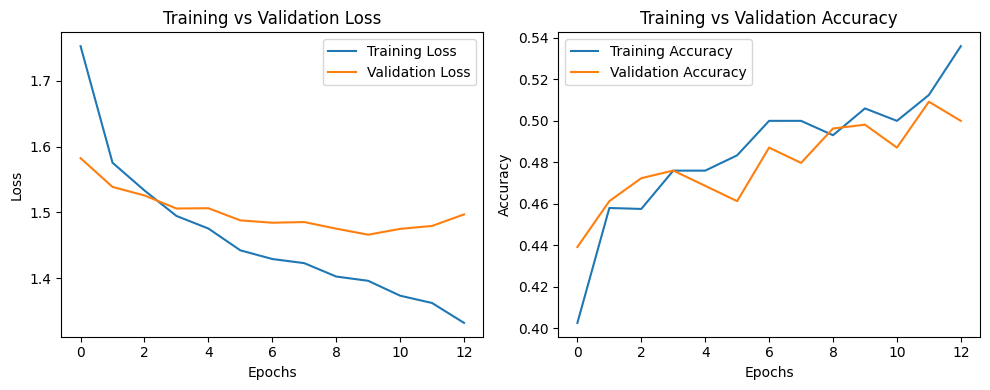

In [324]:
## Visualize the training curves
plt.figure(figsize=(10, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [326]:
model1 = create_model_config1()
model1.summary()

/home/daniel-magero-mugulo/Documents/Data Science/Yr2Sem1/Coding/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_111 (Dense)               │ (None, 256)            │         7,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_59 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 12)             │           780 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,356 (192.80 KB)

 Trainable params: 49,356 (192.80 KB)

 Non-trainable params: 0 (0.00 B)

In [327]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model1.fit(
    X_train_scaled, y_train_enc,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    verbose=1,
    callbacks=[early_stop]
)



Epoch 1/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1659 - loss: 2.7373 - val_accuracy: 0.4077 - val_loss: 2.4034
Epoch 2/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3928 - loss: 2.2965 - val_accuracy: 0.4299 - val_loss: 2.1016
Epoch 3/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4177 - loss: 2.1033 - val_accuracy: 0.4465 - val_loss: 1.9936
Epoch 4/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4413 - loss: 2.0182 - val_accuracy: 0.4428 - val_loss: 1.9444
Epoch 5/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4413 - loss: 1.9793 - val_accuracy: 0.4539 - val_loss: 1.9145
Epoch 6/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4519 - loss: 1.9530 - val_accuracy: 0.4502 - val_loss: 1.8903
Epoch 7/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4533 - loss: 1.9068 - val_accuracy: 0.4594 - val_loss: 1.8738
Epoch 8/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4496 - loss: 1.9151 - val_accu

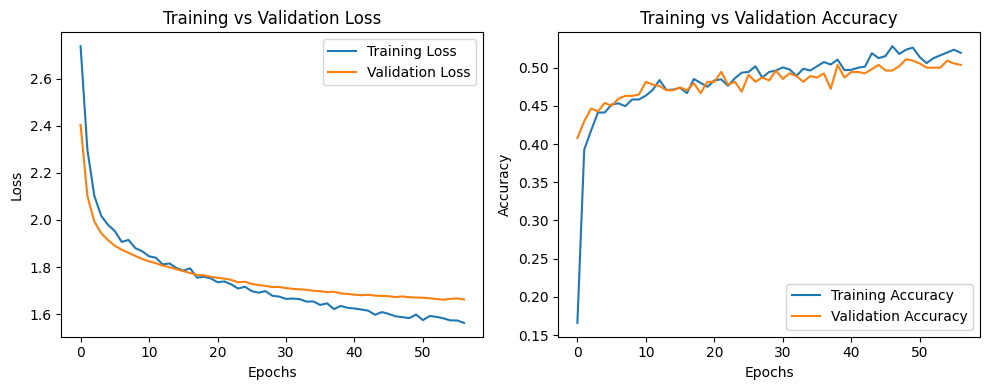

In [328]:
## Visualize the training curves
plt.figure(figsize=(10, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [329]:
model2 = create_model_config2()
model2.summary()

/home/daniel-magero-mugulo/Documents/Data Science/Yr2Sem1/Coding/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_115 (Dense)               │ (None, 256)            │         7,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 192)            │        49,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 192)            │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 128)            │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 12)             │           780 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,068 (363.55 KB)

 Trainable params: 91,788 (358.55 KB)

 Non-trainable params: 1,280 (5.00 KB)

In [330]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model2.fit(
    X_train_scaled, y_train_enc,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    verbose=1,
    callbacks=[early_stop]
)



Epoch 1/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.3526 - loss: 2.0331 - val_accuracy: 0.4225 - val_loss: 1.6814
Epoch 2/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4196 - loss: 1.6948 - val_accuracy: 0.4410 - val_loss: 1.5680
Epoch 3/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4492 - loss: 1.6364 - val_accuracy: 0.4483 - val_loss: 1.5462
Epoch 4/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4672 - loss: 1.5707 - val_accuracy: 0.4705 - val_loss: 1.5215
Epoch 5/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4677 - loss: 1.5590 - val_accuracy: 0.4668 - val_loss: 1.5320
Epoch 6/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4607 - loss: 1.5388 - val_accuracy: 0.4465 - val_loss: 1.5074
Epoch 7/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4552 - loss: 1.5376 - val_accuracy: 0.4705 - val_loss: 1.4805
Epoch 8/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4723 - loss: 1.4844 - val

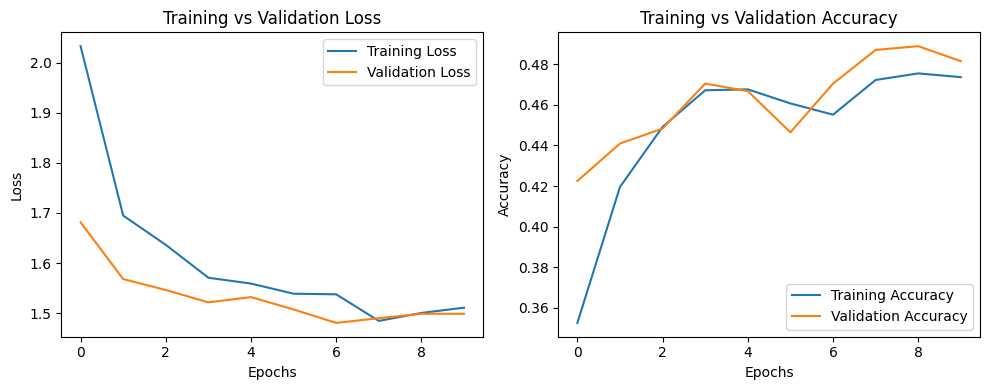

In [331]:
## Visualize the training curves
plt.figure(figsize=(10, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [332]:
## saving all models
model.save('crop_prediction_ffnnv1.h5')
print("Model trained and saved as 'crop_prediction_ffnnv1.h5'")
model1.save('crop_prediction_ffnnv2.h5')
print("Model trained and saved as 'crop_prediction_ffnnv2.h5'")
model2.save('crop_prediction_ffnnv3.h5')
print("Model trained and saved as 'crop_prediction_ffnnv3.h5'")

Model trained and saved as 'crop_prediction_ffnnv1.h5'
Model trained and saved as 'crop_prediction_ffnnv2.h5'
Model trained and saved as 'crop_prediction_ffnnv3.h5'


In [ ]:
loaded_model = load_model('crop_prediction_ffnnv1.h5')
y_pred_probs = loaded_model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\n=== Test Data Evaluation ===")
print("Accuracy:", accuracy_score(y_test_enc, y_pred))
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred, target_names=class_names))

print("\nConfusion Matrix:\n", confusion_matrix(y_test_enc, y_pred))

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

=== Test Data Evaluation ===
Accuracy: 0.49870801033591733

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.25      0.36       169
           1       0.50      0.05      0.10        75
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00         7
           4       0.48      0.66      0.56       217
           5       0.00      0.00      0.00        17
           6       0.00      0.00      0.00        23
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00        23
          10       0.53      0.78      0.63       380
          11       0.41      0.44      0.43       209

    accuracy                           0.50      1161
   macro avg       0.21      0.18      0.17      1161
weighted avg       0.46      0.50      0.45      1161


Confusio

/home/daniel-magero-mugulo/Documents/Data Science/Yr2Sem1/Coding/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/daniel-magero-mugulo/Documents/Data Science/Yr2Sem1/Coding/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/daniel-magero-mugulo/Documents/Data Science/Yr2Sem1/Coding/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sa

In [ ]:
loaded_model = load_model('crop_prediction_ffnnv2.h5')
y_pred_probs = loaded_model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\n=== Test Data Evaluation ===")
print("Accuracy:", accuracy_score(y_test_enc, y_pred))
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred, target_names=class_names))

print("\nConfusion Matrix:\n", confusion_matrix(y_test_enc, y_pred))

In [ ]:
loaded_model = load_model('crop_prediction_ffnnv3.h5')
y_pred_probs = loaded_model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\n=== Test Data Evaluation ===")
print("Accuracy:", accuracy_score(y_test_enc, y_pred))
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred, target_names=class_names))

print("\nConfusion Matrix:\n", confusion_matrix(y_test_enc, y_pred))

In [334]:
## K-Fold metric testing
# Define the Keras model wrapper
estimator = KerasClassifier(build_fn=create_model, epochs=50, batch_size=16, verbose=0)

# Define K-Fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define multiple scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Perform cross-validation
cv_results = cross_validate(estimator, X_train_scaled, y_train_enc, cv=kfold, scoring=scoring)

# Print per-fold results
print("\n=== K-Fold Cross Validation Results ===")
print("Accuracy per fold: ", np.round(cv_results['test_accuracy'], 4))
print("Precision per fold:", np.round(cv_results['test_precision'], 4))
print("Recall per fold:   ", np.round(cv_results['test_recall'], 4))
print("F1-score per fold: ", np.round(cv_results['test_f1'], 4))

# Print averages and standard deviations
print("\nMean Scores Across Folds:")
print("Accuracy : %.2f%% (+/- %.2f%%)" % (cv_results['test_accuracy'].mean() * 100, cv_results['test_accuracy'].std() * 100))
print("Precision: %.2f%% (+/- %.2f%%)" % (cv_results['test_precision'].mean() * 100, cv_results['test_precision'].std() * 100))
print("Recall   : %.2f%% (+/- %.2f%%)" % (cv_results['test_recall'].mean() * 100, cv_results['test_recall'].std() * 100))
print("F1-Score : %.2f%% (+/- %.2f%%)" % (cv_results['test_f1'].mean() * 100, cv_results['test_f1'].std() * 100))



/home/daniel-magero-mugulo/Documents/Data Science/Yr2Sem1/Coding/venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/daniel-magero-mugulo/Documents/Data Science/Yr2Sem1/Coding/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/daniel-magero-mugulo/Documents/Data Science/Yr2Sem1/Coding/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr


=== K-Fold Cross Validation Results ===
Accuracy per fold:  [0.4963 0.4787 0.4824 0.4566 0.4677]
Precision per fold: [0.4553 0.4504 0.4478 0.4412 0.4647]
Recall per fold:    [0.4963 0.4787 0.4824 0.4566 0.4677]
F1-score per fold:  [0.4698 0.451  0.4579 0.4292 0.445 ]

Mean Scores Across Folds:
Accuracy : 47.63% (+/- 1.35%)
Precision: 45.19% (+/- 0.79%)
Recall   : 47.63% (+/- 1.35%)
F1-Score : 45.06% (+/- 1.35%)


/home/daniel-magero-mugulo/Documents/Data Science/Yr2Sem1/Coding/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


### 8. Critical Analysis

a) Which features were most informative and why?
- The features that the feature selection tests show were most effective were the
    - T2M_MIN-Su | Weather (Min Temp)
    - QV2M-Au | Weather (Moisture)
    - PRECTOTCORR | Weather (Precipitation)
    - T2M_MAX-Au | Weather (Max Temp)
    - T2M_MIN-Au | Weather (Min Temp)
    - T2M_MAX | Weather (Max Temp)
    - T2M_MIN | Weather (Min Temp)
    - CLOUD_AMT |Weather (Cloud Cover)
    - WD10M | Weather (Wind)
    - WS2M_RANGE | Weather (Wind Range)

I believe they were the most informative because they were the most significant in the feature selection tests.

b) How did feature selection impact model performance and complexity?
- Feature selection reduced the number of features in the model, which in turn reduced the complexity of the model. This also helped to prevent underfitting
- The model was really hard to train, I had to go from RandomForest -> XGBoost -> FNN

c) Which model performed best and why?
- The FNN(Sequential) performed best becuase it has the ability to identify the relationships that exist between the data points.

d) Discuss practical issues encountered
- The initial dataset I had failed to give me a positive R^2
- I chose another and the correlation is also low
- There seems to be a way in which the data is recorded that makes it hard to predict the best plant for an environment.
- There were also a lot of outliers and the standardizing enabled the training to continue
- The dataset might also have been too small, less that 4,000 records are not enough to determine the effect across many crops and in many countries

e) Support your analysis with clear plots, graphs, or diagrams (for example,
confusion matrices, ROC curves, regression plots).
- These exist within teh work

f) If multiple models or methods were tried, discuss the comparative
outcomes.
The models that I used in the FNN though giving me similar outcomes tended to have different graphs with some being far more erractic than others as seen above. The most stable was model1 as seen in the training curve and that is because it went through more epochs during the learning process.